In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_1samp
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
import warnings

In [222]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [223]:
# Load dataset
df = pd.read_csv("kidney_disease.csv")

# Step 1: Exploratory Data Analysis (EDA)

Step 1.1: Check Distribution of Each Field

In [224]:
df.head(10)

id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44   7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38   6000  NaN   no   no   no  good   no   no   
2  notpresent  ...   31   7500  NaN   no  yes   no  poor   no  yes   
3  notpresent  ...   32   6700  3.9  yes   no   no  poor  yes  yes   
4  notpresent  ...   35   7300  4.6   no   no   no  good   no   no   
5  notpresent  ...   39   7800  4.4  yes  yes   no  good  yes   no   
6  notpresent  ...   36    NaN  NaN   no   no   no  good   no   no   
7  notpresent  ...   44   6900    5   no  yes   no  good  yes   no   
8  notpresent  ...   33   9600  4.0  yes  yes   no  good   no  yes   
9  notpresent  ...   29  12100  3.7  yes  yes   no  poor   no  yes   

  classification  
0            ckd  
1            ckd  
2            ckd  
3            ckd  
4            ckd  
5            ckd  
6            ckd  
7            ckd  
8            ckd  
9            ckd  

[10 rows x 26 columns]

In [225]:

df['classification'].value_counts()  # Target variable inspection

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [226]:
# Rename columns for easier access
df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 
              'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 
              'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 
              'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 
              'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class'] # renaming columns

In [227]:
df.drop('id',axis=1, inplace=True)

In [228]:
# Quick summary to get an overview of numerical columns
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  
count  312.000000   348.000000  
mean     4.627244    12.526437  
std      3.193904     2.912587  
min      2.500000     3.100000  
25%      3.800000    10.300000  
50%      4.400000    12.650000  
75%      4.900000    15.000000  
max     47.000000    17.800000

In [229]:
# Convert columns to numeric where necessary
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [230]:
# Step 1.1: Categorical and Numerical Columns Identification
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [231]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [232]:
# Check unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [233]:
# Step 1.2: Data Cleaning (Cleaning specific text entries for consistent categories)
df['diabetes_mellitus'].replace({'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'].replace('\tno', 'no', inplace=True)
df['class'].replace({'ckd\t':'ckd', 'notckd': 'not ckd'}, inplace=True)

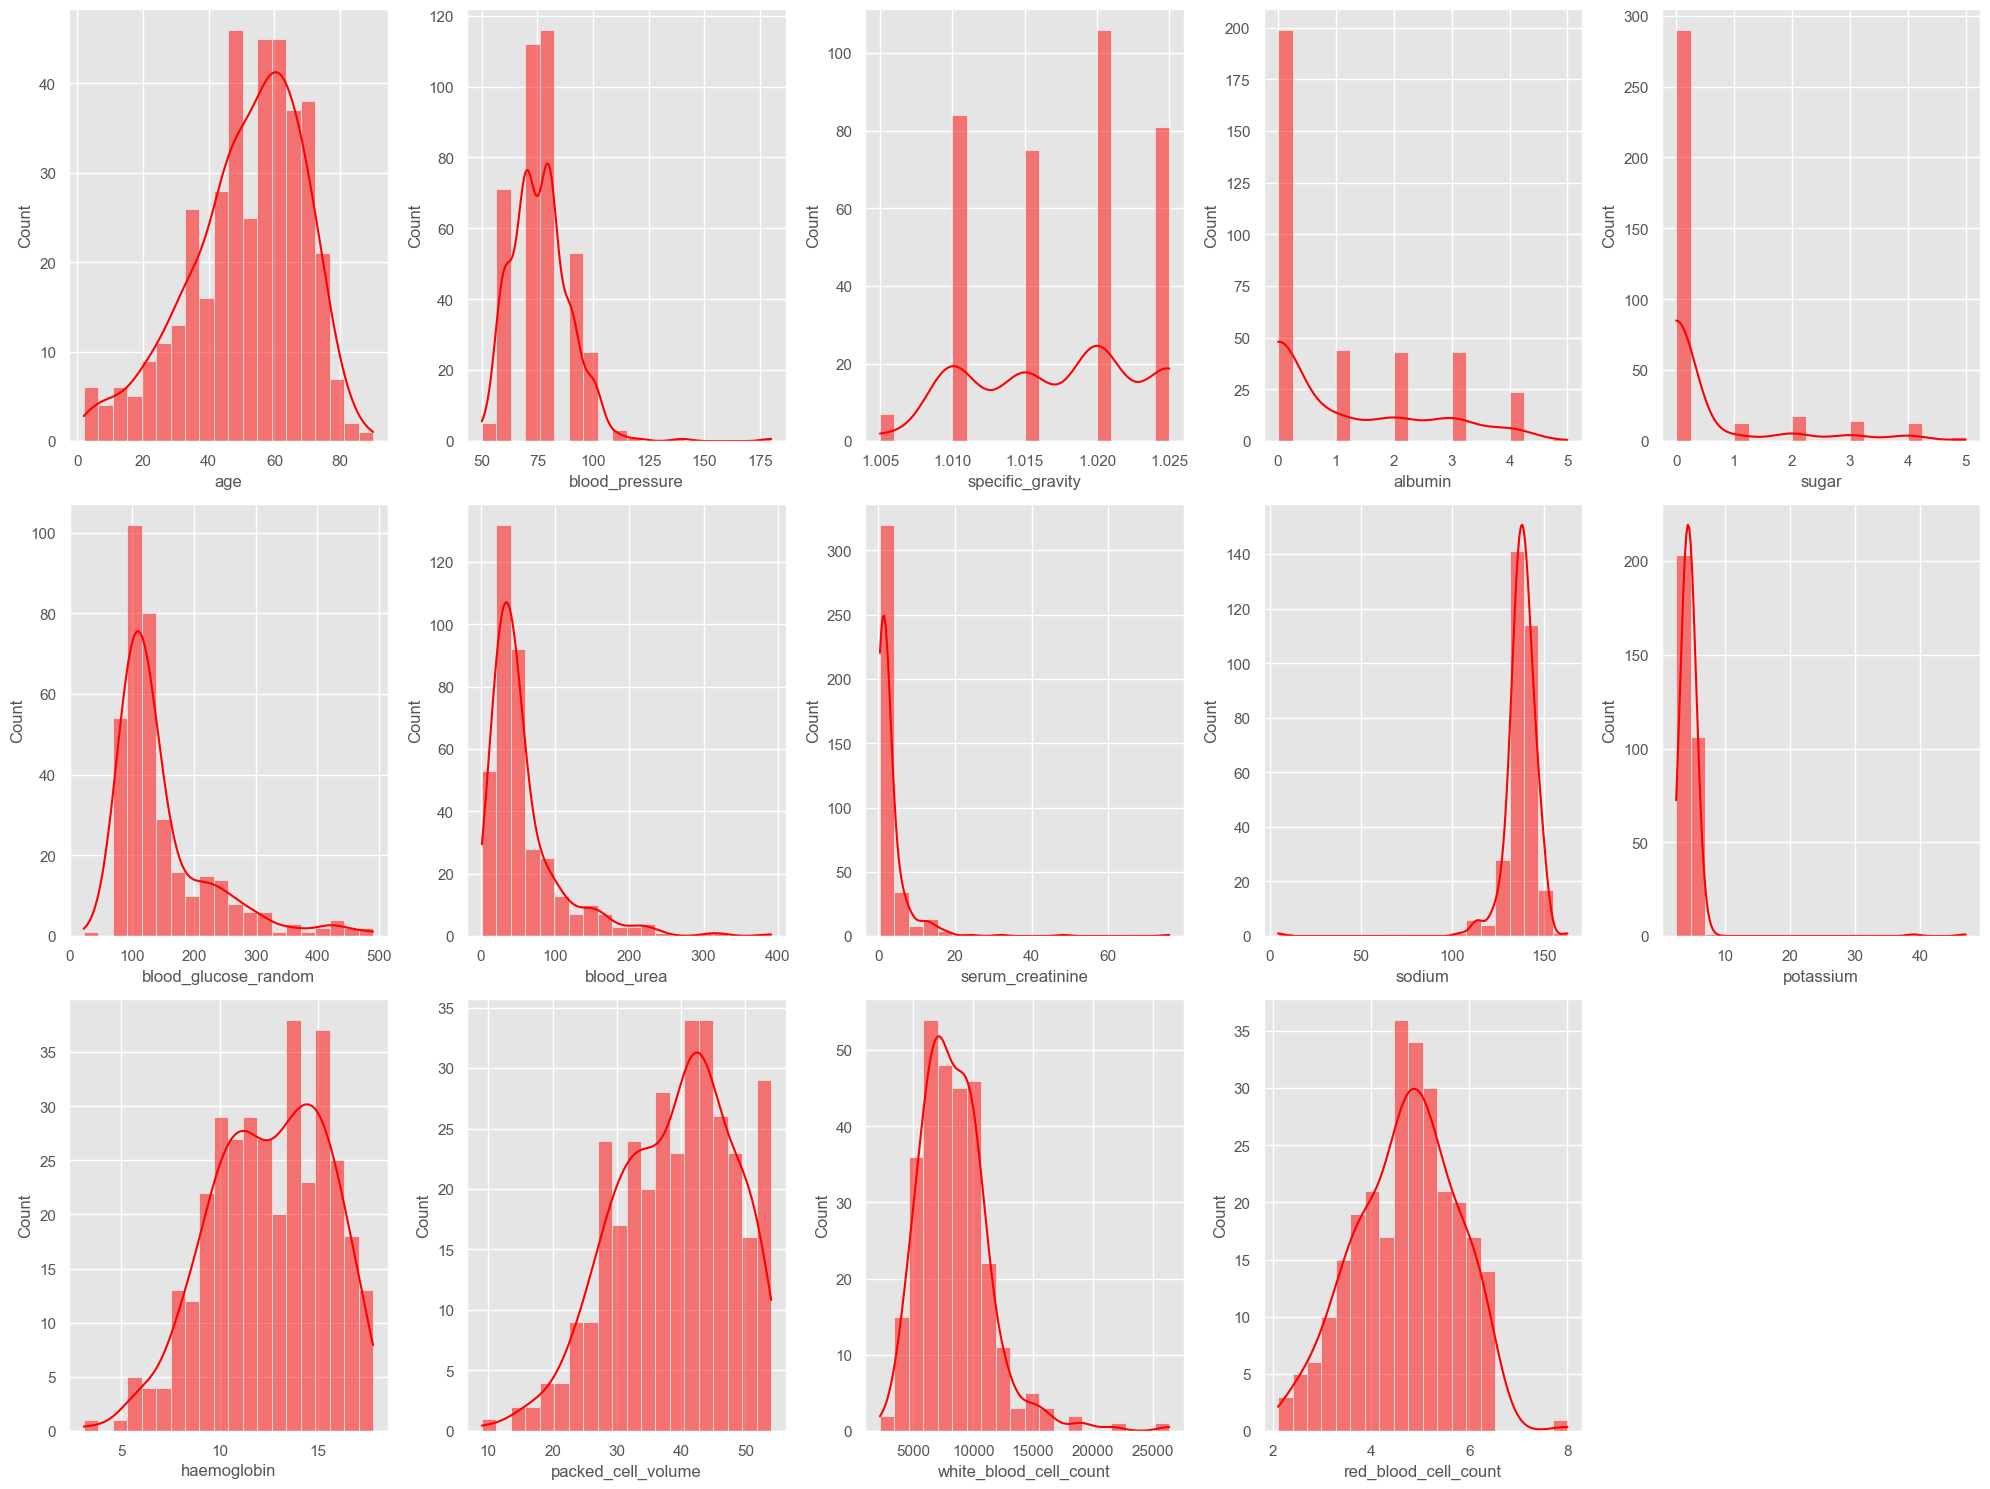

In [234]:
# Step 1.3: Visualizing Distributions of Numerical Features
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], bins=20, ax=ax, kde=True, color="red")
        ax.set_xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

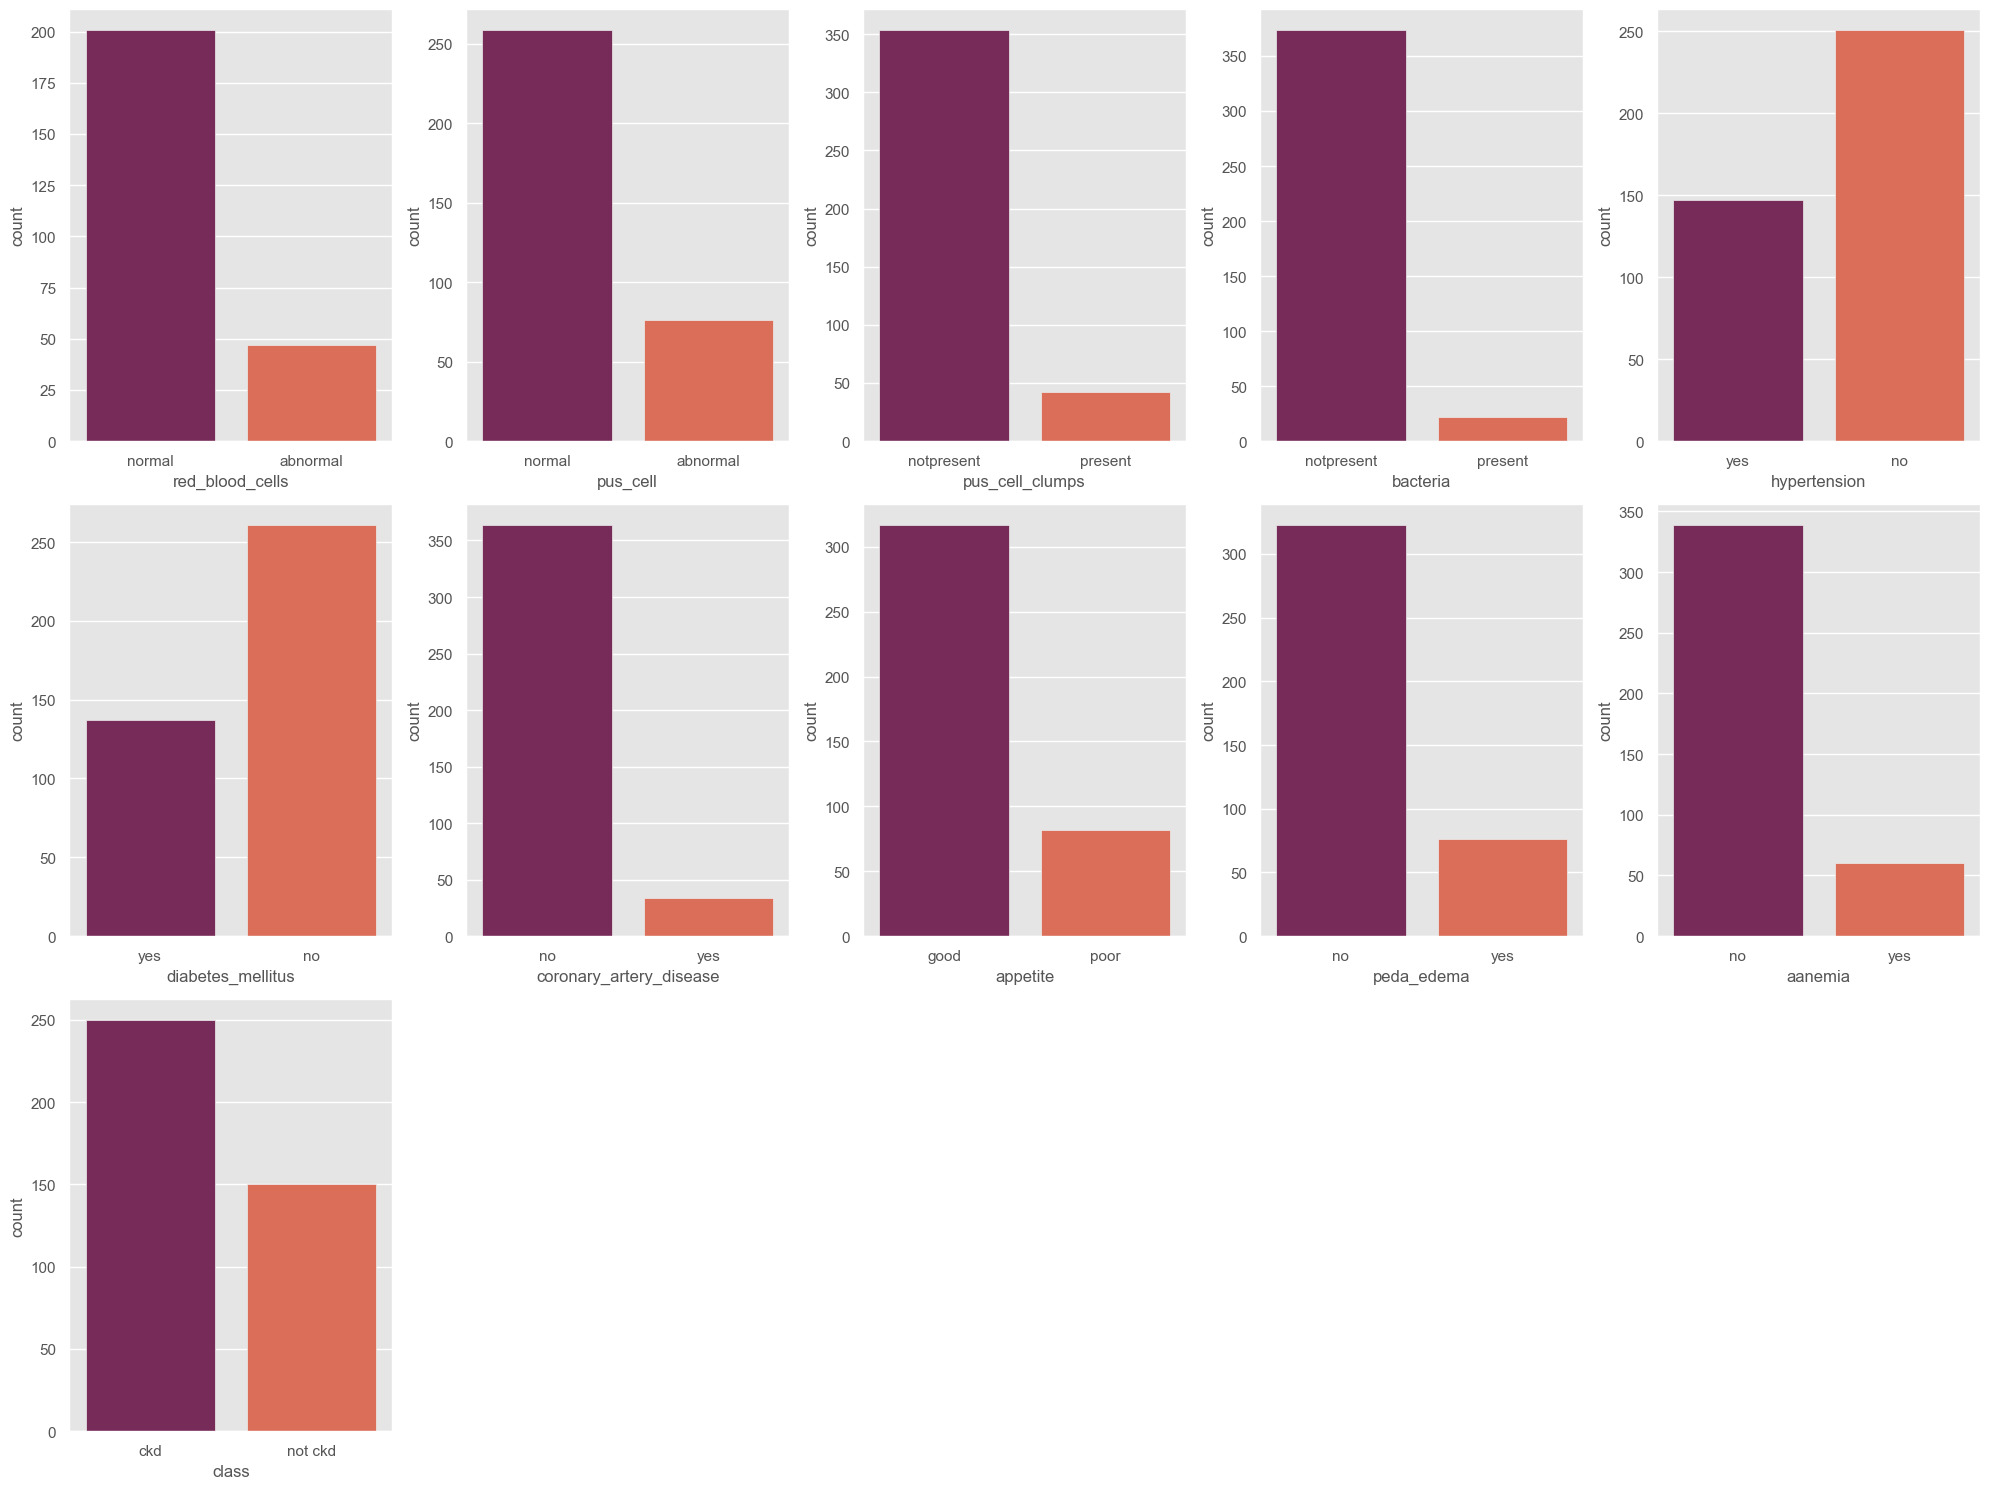

In [235]:
# Step 1.4: Categorical Distributions
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(x=df[column], palette='rocket')
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [236]:
df['age']

0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64

In [237]:
from scipy.stats import shapiro
normality_results = {}
# Step 1.2: Check Normality using Shapiro-Wilk Test
for column in num_cols:
    clean_data = df[column].dropna()  # Remove NaN values for test
    shapiro_stat, p_value = shapiro(clean_data)
    normality_results[col] = p_value
    print(f"SW Test for {column}: Statistic={shapiro_stat}, P-value={p_value}")
# Displaying normality test results
print(pd.DataFrame.from_dict(normality_results, orient='index', columns=['p-value']))

SW Test for age: Statistic=0.9639029114889367, P-value=3.155049297644778e-08
SW Test for blood_pressure: Statistic=0.8681503490559113, P-value=1.2313409228428595e-17
SW Test for specific_gravity: Statistic=0.8816577276410376, P-value=7.511105213426834e-16
SW Test for albumin: Statistic=0.7447639123762586, P-value=5.505137709775377e-23
SW Test for sugar: Statistic=0.4680796812968995, P-value=5.4171833666879725e-31
SW Test for blood_glucose_random: Statistic=0.7678639193161365, P-value=4.309587713071842e-22
SW Test for blood_urea: Statistic=0.7222726556799595, P-value=1.0721529229554324e-24
SW Test for serum_creatinine: Statistic=0.3977923839939804, P-value=1.0443480469097894e-33
SW Test for sodium: Statistic=0.6051863300448135, P-value=3.7410576559410765e-26
SW Test for potassium: Statistic=0.2012289249964233, P-value=2.4627358176265627e-34
SW Test for haemoglobin: Statistic=0.9798545767460272, P-value=8.645817119903378e-05
SW Test for packed_cell_volume: Statistic=0.9726775249351948, P

The Shapiro-Wilk test checks for normality, with a p-value below 0.05 suggesting non-normality.

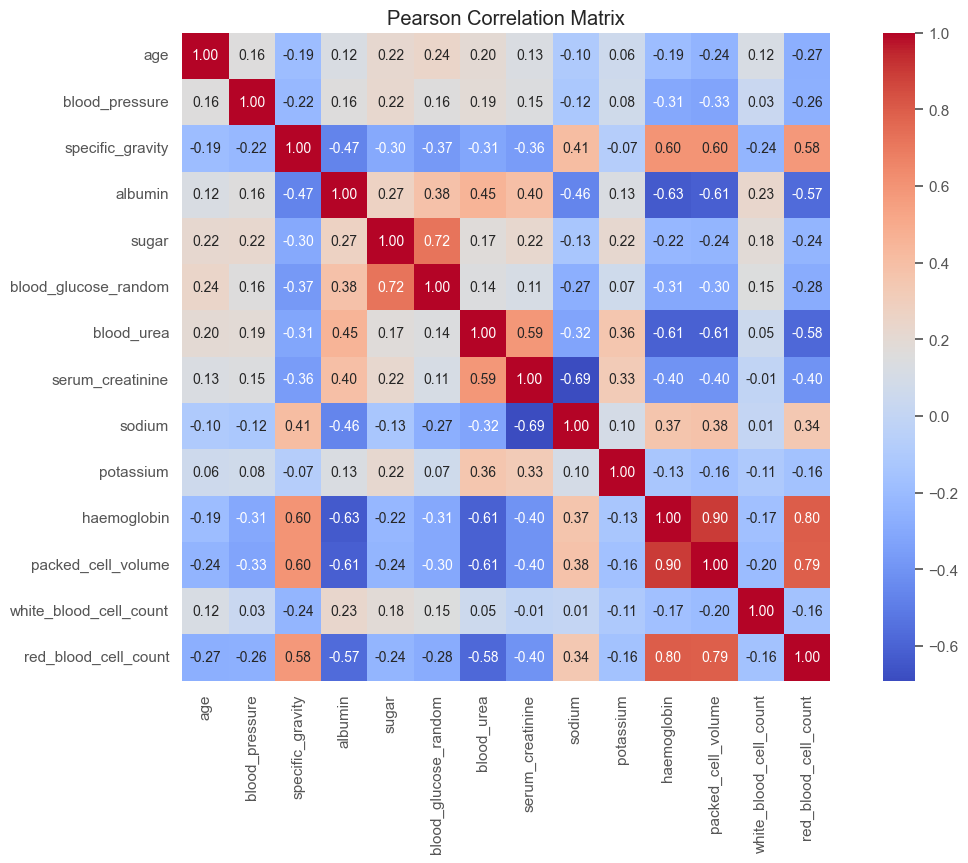

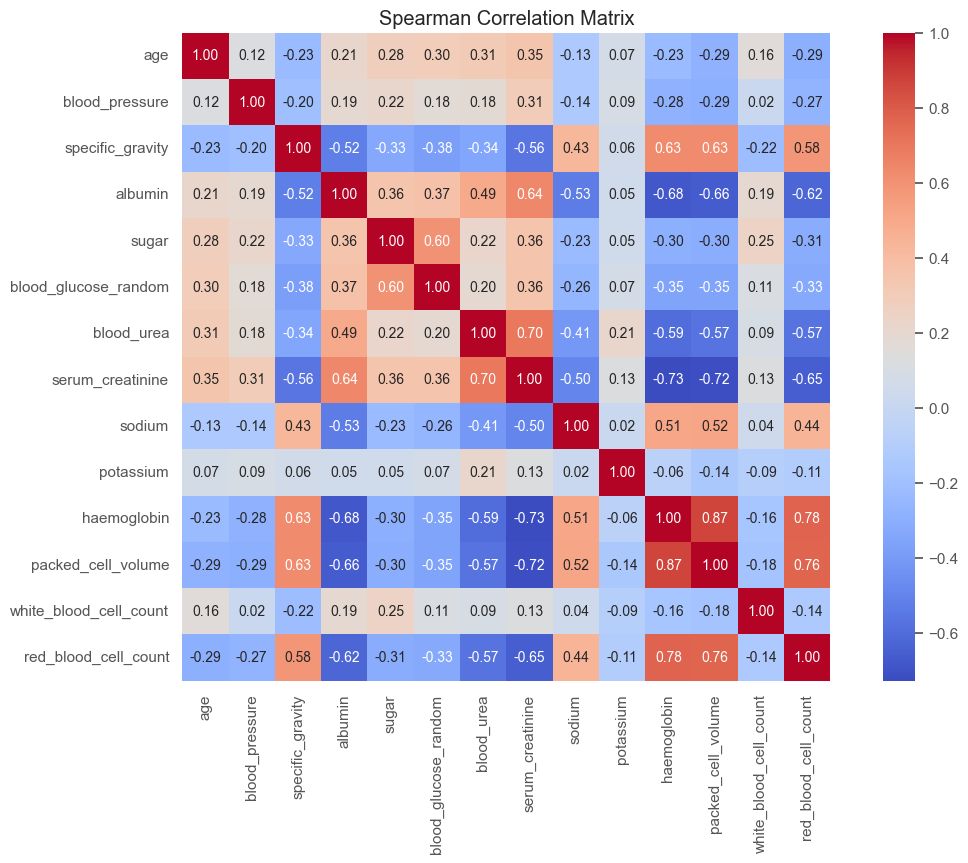

In [238]:
# Pearson correlation
pearson_corr = df[num_cols].corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

# Spearman correlation
spearman_corr = df[num_cols].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()


In [239]:
# checking for missing value
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [240]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [241]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

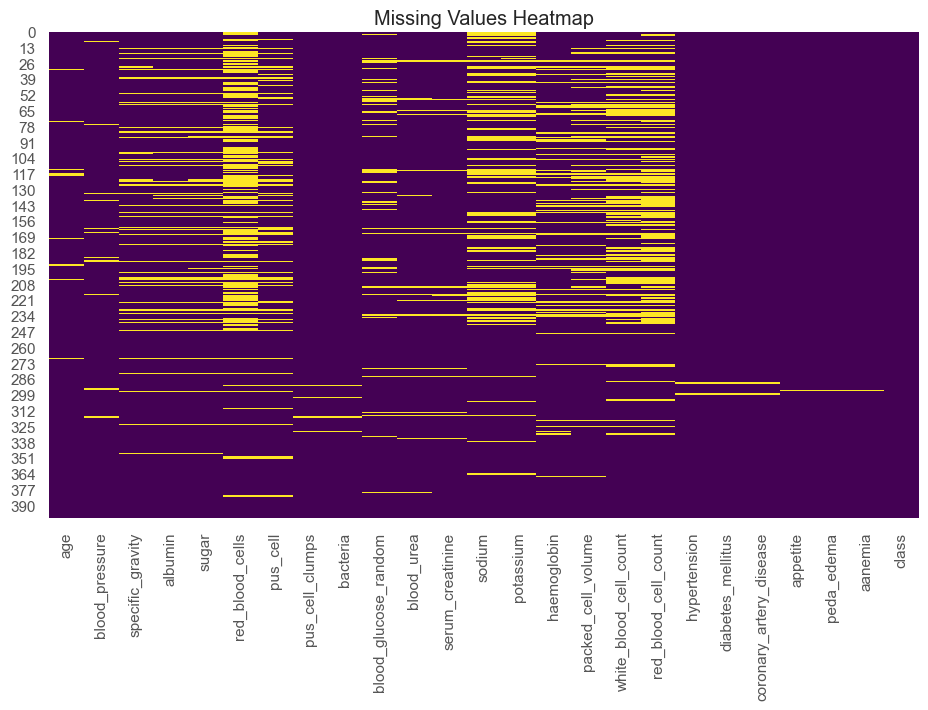

In [242]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

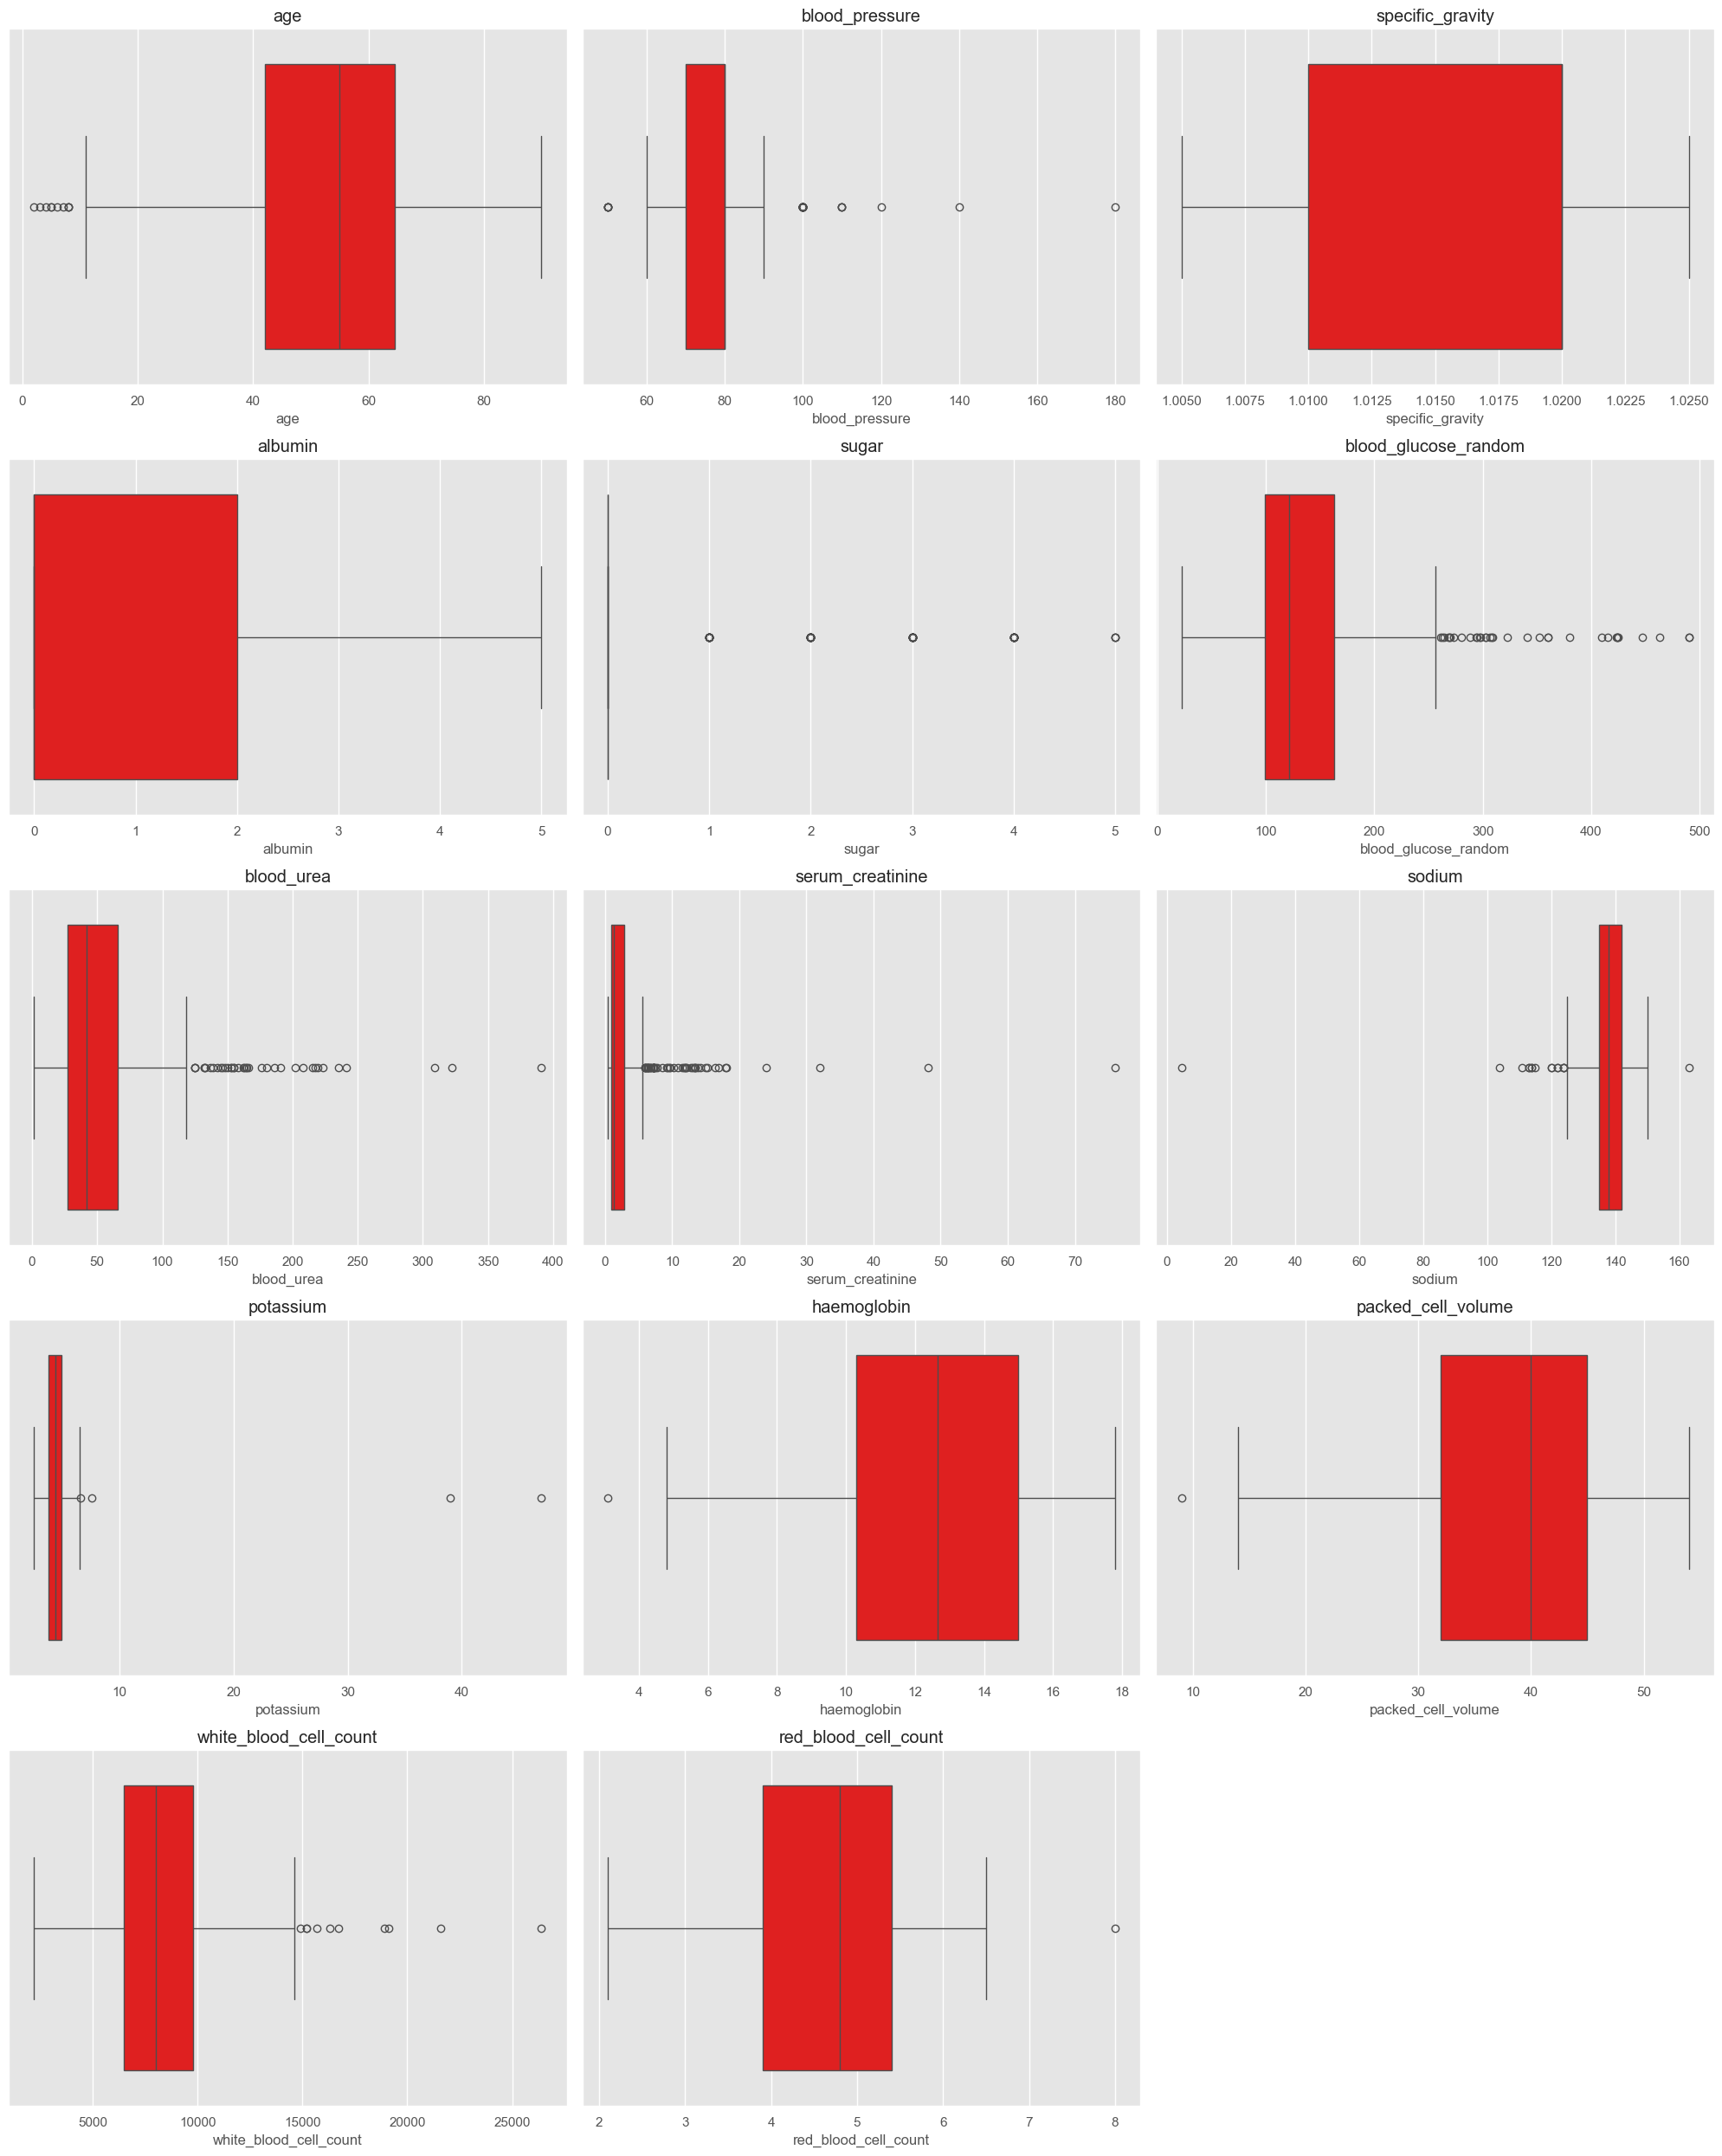

In [243]:
# Define number of rows and columns for the grid
num_cols_length = len(num_cols)
n_rows = (num_cols_length // 3) + (num_cols_length % 3 > 0)  # 3 columns per row, adjust rows accordingly

# Create subplots grid
fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 5))  # 3 plots per row, adjust size for better visibility
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each boxplot in the grid
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], color="red", ax=axes[i])
    axes[i].set_title(col)  # Set title for each plot based on the column name

# Hide any remaining empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [244]:
#Step 1.5: Outlier Detection

outlier_results = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outlier_results[col] = ((df[col] < lower_fence) | (df[col] > upper_fence)).sum()

# Display outlier count per column
print(pd.DataFrame.from_dict(outlier_results, orient='index', columns=['Outliers Count']))


                        Outliers Count
age                                 10
blood_pressure                      36
specific_gravity                     0
albumin                              0
sugar                               61
blood_glucose_random                34
blood_urea                          38
serum_creatinine                    51
sodium                              16
potassium                            4
haemoglobin                          1
packed_cell_volume                   1
white_blood_cell_count              10
red_blood_cell_count                 1


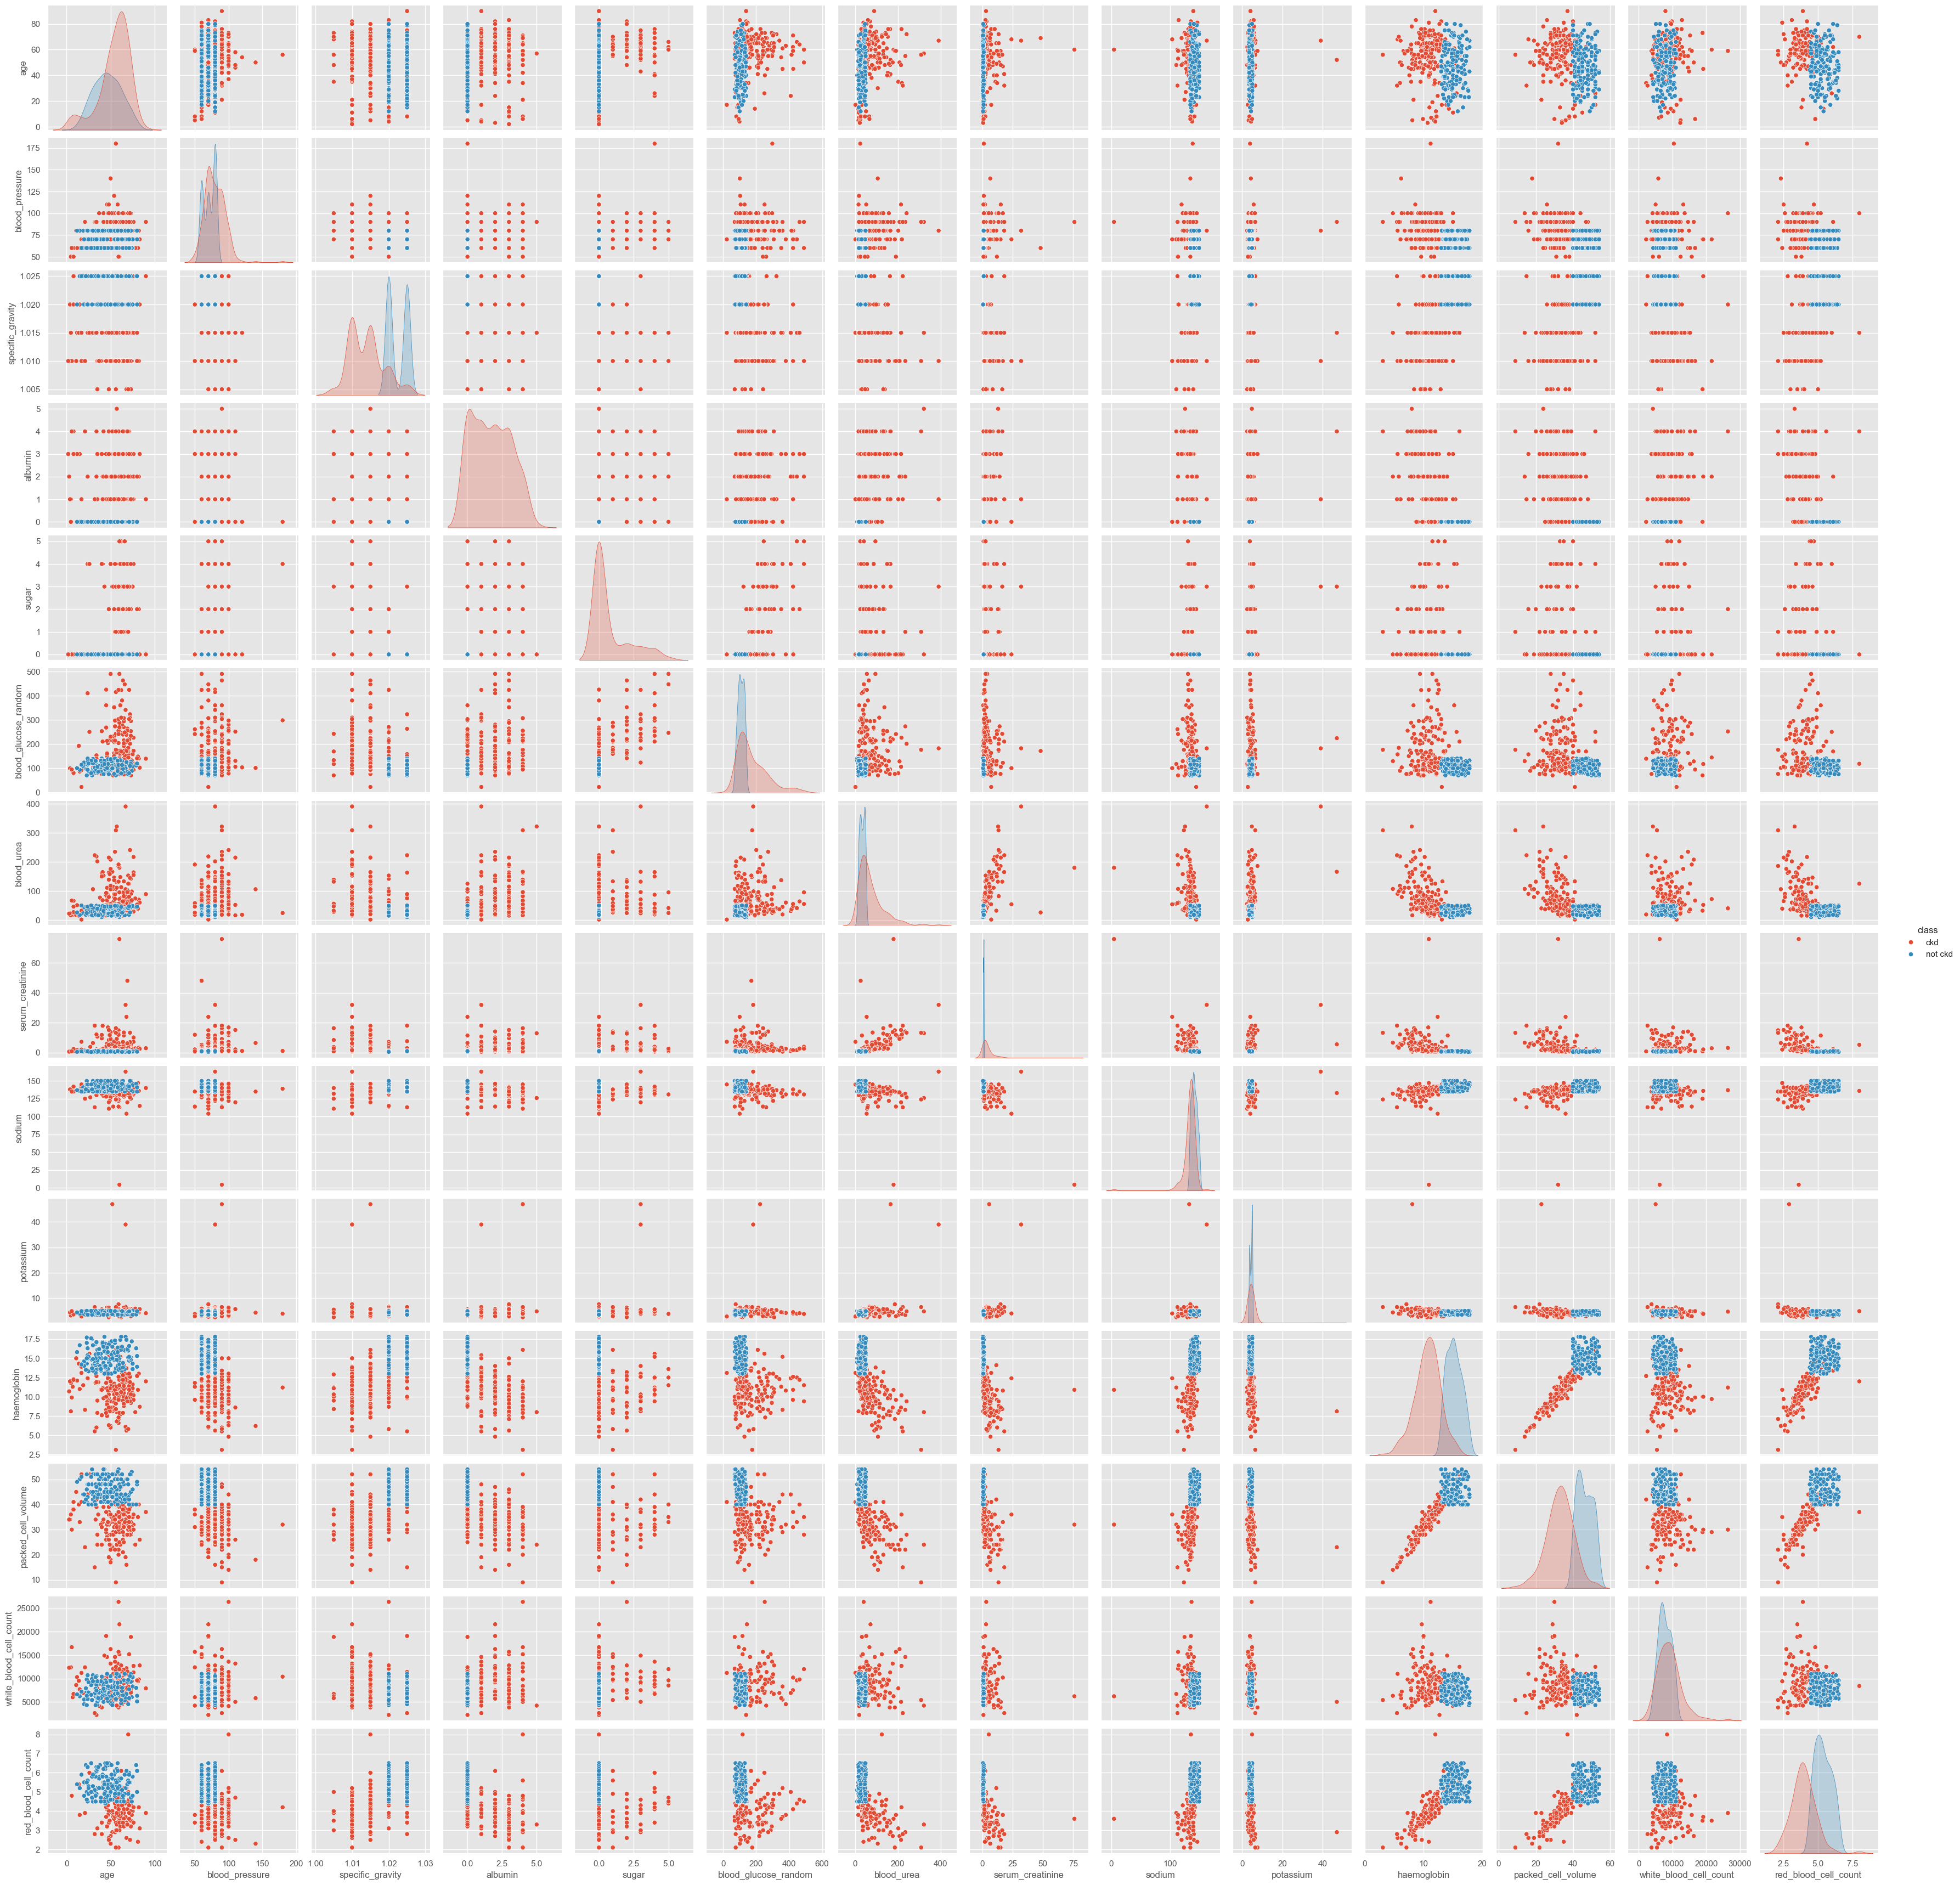

In [245]:

sns.pairplot(df[num_cols + ["class"]], hue="class")

### Step 2: Handle Null Values, Correlations, and Outliers

In [246]:
#Step 2.1: Imputation of Missing Values

In [247]:
pearson_corr['packed_cell_volume'].loc[pearson_corr['packed_cell_volume'].abs() > 0.5]

specific_gravity        0.603560
albumin                -0.611891
blood_urea             -0.607621
haemoglobin             0.895382
packed_cell_volume      1.000000
red_blood_cell_count    0.791625
Name: packed_cell_volume, dtype: float64

In [248]:
from fancyimpute import IterativeImputer
import numpy as np

In [249]:
mice_imputer = IterativeImputer()

In [250]:
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()

In [251]:
# Step 1: Handle numerical columns with MICE
imputed_columns = []
for col in num_cols:
    # Skip columns that have already been imputed
    if col in imputed_columns:
        continue
    
    # Get correlated columns (consider only those with missing values)
    correlated_cols = pearson_corr[col].loc[pearson_corr[col].abs() > 0.5].index.tolist()
    
    # Apply MICE imputation only to the selected correlated columns
    if correlated_cols:
        # Ensure we only keep columns that haven't been imputed yet
        correlated_cols_to_impute = [c for c in correlated_cols if c not in imputed_columns]
        
        if correlated_cols_to_impute:  # Only proceed if there are columns to impute
            imputation_data = df[correlated_cols_to_impute].copy()
            imputation_data = mice_imputer.fit_transform(imputation_data)
            
            # Update the DataFrame with the imputed values
            df[correlated_cols_to_impute] = imputation_data
            
            # Add the imputed columns to the list
            imputed_columns.extend(correlated_cols_to_impute)

# The rest of your code remains the same...


In [252]:
imputed_columns

['age',
 'blood_pressure',
 'specific_gravity',
 'haemoglobin',
 'packed_cell_volume',
 'red_blood_cell_count',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'white_blood_cell_count']

In [253]:
# Step 2: Check for remaining missing values in numerical columns
remaining_num_missing_cols = [col for col in num_cols if df[col].isnull().any()]
remaining_num_missing_cols

[]

In [254]:
# If there are still numerical columns with missing values, apply random imputation
if remaining_num_missing_cols:
    for col in remaining_num_missing_cols:
        df[col] = df[col].fillna(np.random.choice(df[col].dropna(), size=df[col].isnull().sum()))

In [255]:
# Step 3: Handle categorical columns with Mode Imputation
remaining_missing_cols = df.columns[df.isnull().any()].tolist()
remaining_missing_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [256]:
for col in remaining_missing_cols:
    if col in cat_cols:
        # Apply mode imputation for categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill with mode

In [257]:
# checking for missing value
df.isnull().sum().sort_values(ascending=False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

Step 2.2: Impute Outliers

In [258]:
# You can replace outliers with the lower/upper fence values:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_fence, lower_fence, df[col])
    df[col] = np.where(df[col] > upper_fence, upper_fence, df[col])

Step 2.3: Create New Datasets

In [259]:
# Creating datasets based on correlations
high_corr_pairs = [(col1, col2) for col1 in num_cols for col2 in num_cols if col1 != col2 and pearson_corr.loc[col1, col2] > 0.7]
high_corr_pairs


[('sugar', 'blood_glucose_random'),
 ('blood_glucose_random', 'sugar'),
 ('haemoglobin', 'packed_cell_volume'),
 ('haemoglobin', 'red_blood_cell_count'),
 ('packed_cell_volume', 'haemoglobin'),
 ('packed_cell_volume', 'red_blood_cell_count'),
 ('red_blood_cell_count', 'haemoglobin'),
 ('red_blood_cell_count', 'packed_cell_volume')]

In [260]:
# Create a copy of the original DataFrame
df_wo_corr = df.copy()

In [261]:
# Iterate over each pair of high correlation columns
for col1, col2 in high_corr_pairs:
    # Check if col1 is still in the copied DataFrame
    if col1 in df_wo_corr.columns:
        df_wo_corr = df_wo_corr.drop(columns=[col1])  # Drop col1 from the copied DataFrame
        print(f"Dropped {col1} from DataFrame copy")

# Check the resulting DataFrame columns
print("Remaining columns in the modified DataFrame:", df_wo_corr.columns.tolist())
print("Original DataFrame columns remain unchanged:", df.columns.tolist())

Dropped sugar from DataFrame copy
Dropped blood_glucose_random from DataFrame copy
Dropped haemoglobin from DataFrame copy
Dropped packed_cell_volume from DataFrame copy
Dropped red_blood_cell_count from DataFrame copy
Remaining columns in the modified DataFrame: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'white_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
Original DataFrame columns remain unchanged: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_e

In [262]:
df_wo_corr.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
white_blood_cell_count     float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [263]:

cat_cols_wo_corr= [col for col in df_wo_corr.columns if df_wo_corr[col].dtype == 'object']
num_cols_wo_corr= [col for col in df_wo_corr.columns if df_wo_corr[col].dtype != 'object']

In [264]:
cat_cols_wo_corr

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [265]:
num_cols_wo_corr

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'white_blood_cell_count']

In [266]:
len(df_wo_corr.columns)

20

In [267]:
len(df.columns)

25

### Step 3: Feature Engineering

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_selection import chi2
import numpy as np
# label_encoder
from sklearn.preprocessing import LabelEncoder

In [269]:
for col in cat_cols_wo_corr:
    print(f"{col} has {df_wo_corr[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
aanemia has 2
class has 2


In [270]:
le = LabelEncoder()

for col in cat_cols_wo_corr:
    df_wo_corr[col] = le.fit_transform(df_wo_corr[col])

In [271]:
cat_cols_wo_corr.remove("class")
cat_cols_wo_corr

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [272]:
df_wo_corr.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
       'white_blood_cell_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia',
       'class'],
      dtype='object')

In [273]:
from sklearn.model_selection import train_test_split

X = df_wo_corr.drop(columns=['class'])  # Features
y = df_wo_corr['class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [274]:

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap
X_train_encoded = encoder.fit_transform(X_train[cat_cols_wo_corr])
X_test_encoded = encoder.transform(X_test[cat_cols_wo_corr])

# Create DataFrames from the encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cat_cols_wo_corr))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat_cols_wo_corr))


In [275]:
# Step 4: Robust Scaling for Numerical Columns

In [276]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols_wo_corr])
X_test_scaled = scaler.transform(X_test[num_cols_wo_corr])


In [277]:
# Create DataFrames from the scaled features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_cols_wo_corr)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_cols_wo_corr)

In [278]:
X_train_processed = pd.concat([X_train_scaled_df.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_processed = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [304]:
print("Shape of training set with X_train_processed :", X_train_processed.shape)
print("Shape of test set with X_test_processed:", X_test_processed.shape)

Shape of training set with X_train_processed : (320, 19)
Shape of test set with X_test_processed: (80, 19)


In [279]:
len(X_test_processed.columns)

19

In [280]:
X_train_processed.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'white_blood_cell_count',
       'red_blood_cells_1', 'pus_cell_1', 'pus_cell_clumps_1', 'bacteria_1',
       'hypertension_1', 'diabetes_mellitus_1', 'coronary_artery_disease_1',
       'appetite_1', 'peda_edema_1', 'aanemia_1'],
      dtype='object')

In [283]:
cat_cols_wo_corr

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [292]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [291]:
X_train_processed

age  blood_pressure  specific_gravity   albumin  blood_urea  \
0   -0.260870       -0.646907         -1.213817  1.750000    0.451613   
1    0.260870        1.853093          0.786512 -0.250000   -0.483871   
2    1.043478       -1.646907         -0.597759  0.258475    1.032258   
3   -0.608696        0.353093          0.786512 -0.250000   -1.032258   
4   -1.521739        0.353093          0.286430 -0.250000   -0.612903   
..        ...             ...               ...       ...         ...   
315 -0.347826       -1.646907         -0.713735  0.250000    1.612903   
316 -0.173913        1.353093         -0.871693  0.258475    2.451613   
317 -1.347826        0.353093          0.786512 -0.250000   -0.258065   
318 -0.695652        0.353093          0.286430 -0.250000   -0.741935   
319 -1.608696       -1.646907         -0.713735 -0.250000   -0.322581   

     serum_creatinine    sodium  potassium  white_blood_cell_count  \
0                1.25 -2.195953  -2.284054               -0.682449   
1                0.00 -0.481667  -0.409054                1.197551   
2                0.80 -0.481667   1.590946                0.000000   
3               -0.05 -0.481667   0.465946                0.797551   
4               -0.30  0.661190  -0.534054                0.000000   
..                ...       ...        ...                     ...   
315              1.00  0.661190  -0.784054                1.852551   
316              2.40 -2.005477  -0.284054               -0.762449   
317             -0.10  1.423094  -0.784054               -0.482449   
318             -0.40  1.804047  -1.409054               -0.442449   
319              0.40  0.661190  -0.534054               -0.562449   

     red_blood_cells_1  pus_cell_1  pus_cell_clumps_1  bacteria_1  \
0                  1.0         0.0                1.0         0.0   
1                  1.0         1.0                0.0         0.0   
2                  1.0         1.0                0.0         0.0   
3                  1.0         1.0                0.0         0.0   
4                  1.0         1.0                0.0         0.0   
..                 ...         ...                ...         ...   
315                1.0         1.0                0.0         0.0   
316                1.0         1.0                0.0         0.0   
317                1.0         1.0                0.0         0.0   
318                1.0         1.0                0.0         0.0   
319                1.0         1.0                0.0         0.0   

     hypertension_1  diabetes_mellitus_1  coronary_artery_disease_1  \
0               1.0                  0.0                        0.0   
1               1.0                  1.0                        1.0   
2               0.0                  1.0                        0.0   
3               0.0                  0.0                        0.0   
4               0.0                  0.0                        0.0   
..              ...                  ...                        ...   
315             1.0                  1.0                        0.0   
316             1.0                  1.0                        0.0   
317             0.0                  0.0                        0.0   
318             0.0                  0.0                        0.0   
319             0.0                  0.0                        0.0   

     appetite_1  peda_edema_1  aanemia_1  
0           1.0           1.0        1.0  
1           0.0           0.0        0.0  
2           0.0           0.0        1.0  
3           0.0           0.0        0.0  
4           0.0           0.0        0.0  
..          ...           ...        ...  
315         0.0           0.0        0.0  
316         0.0           1.0        1.0  
317         0.0           0.0        0.0  
318         0.0           0.0        0.0  
319         0.0           0.0        0.0  

[320 rows x 19 columns]

In [293]:
k = 10  # Specify how many top features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_kbest = selector.fit_transform(X_train_processed, y_train)

In [294]:
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train_processed.columns[selected_indices]

# Display the selected features and their scores
scores = selector.scores_[selected_indices]
mi_results = pd.DataFrame({'Feature': selected_features, 'Mutual Information Score': scores})

# Sort by Mutual Information Score
mi_results = mi_results.sort_values(by='Mutual Information Score', ascending=False)

print(mi_results)

                  Feature  Mutual Information Score
1        specific_gravity                  0.438125
4        serum_creatinine                  0.384719
2                 albumin                  0.349745
6               potassium                  0.243195
5                  sodium                  0.240061
9     diabetes_mellitus_1                  0.200068
8          hypertension_1                  0.186574
3              blood_urea                  0.169770
0          blood_pressure                  0.143817
7  white_blood_cell_count                  0.131575


In [296]:
selected_features

Index(['blood_pressure', 'specific_gravity', 'albumin', 'blood_urea',
       'serum_creatinine', 'sodium', 'potassium', 'white_blood_cell_count',
       'hypertension_1', 'diabetes_mellitus_1'],
      dtype='object')

In [297]:
# Create DataFrame with only the selected features from SelectKBest
X_train_kbest_df = X_train_processed[selected_features].copy()
X_test_kbest_df = X_test_processed[selected_features].copy()

In [299]:
print("Shape of training set with SelectKBest features:", X_train_kbest_df.shape)
print("Shape of test set with SelectKBest features:", X_test_kbest_df.shape)

Shape of training set with SelectKBest features: (320, 10)
Shape of test set with SelectKBest features: (80, 10)


Apply PCA for Dimensionality Reduction

In [300]:
from sklearn.decomposition import PCA

# Define number of components for PCA
n_components = 10  # You can adjust this number based on explained variance

# Initialize PCA and apply to the processed data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Create DataFrames for PCA-transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print("Shape of training set with PCA-reduced features:", X_train_pca_df.shape)
print("Shape of test set with PCA-reduced features:", X_test_pca_df.shape)


Shape of training set with PCA-reduced features: (320, 10)
Shape of test set with PCA-reduced features: (80, 10)


In [303]:
pca.explained_variance_

7.153368098851976

In [302]:
(pca.explained_variance_ratio_)

array([0.34206178, 0.14040501, 0.10045964, 0.08866198, 0.06950725,
       0.06101041, 0.04227524, 0.02547878, 0.02191172, 0.01837872])

### Modeling

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [318]:
# Function for model evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Get predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Train and test accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Print accuracy and classification report
    print(f"\n{model_name} - Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    print(f"Classification Report (Test):\n{classification_report(y_test, y_test_pred)}")

    # Plot confusion matrix
 #   ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
 #   plt.title(f"{model_name} - Confusion Matrix (Test)")
 #   plt.show()
    
    return train_acc, test_acc

In [326]:
# Plotting precision-recall for multiple algorithms
def plot_precision_recall(model, X_test, y_test, model_name):
    from sklearn.metrics import precision_recall_curve

    # Compute Precision-Recall curve
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {model_name}')
    plt.legend()
    plt.show()

In [327]:
# Function to plot ROC-AUC curve
def plot_roc_auc(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC curve for {model_name}')
    plt.legend()
    plt.show()

In [332]:
# Function to plot combined ROC-AUC curves for multiple models
def plot_combined_roc_auc(models, X_test, y_test, section_title):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        y_score = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Combined ROC-AUC Curve for {section_title}')
    plt.legend()
    plt.show()

#### Modeling Using No Feature Selection


*** Running Models on X_train_processed and X_test_processed ***

Logistic Regression - Train Accuracy: 0.99, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



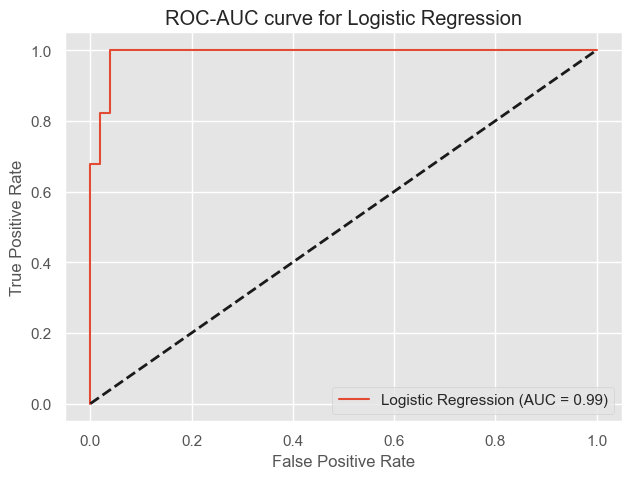


Support Vector Classifier - Train Accuracy: 0.99, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



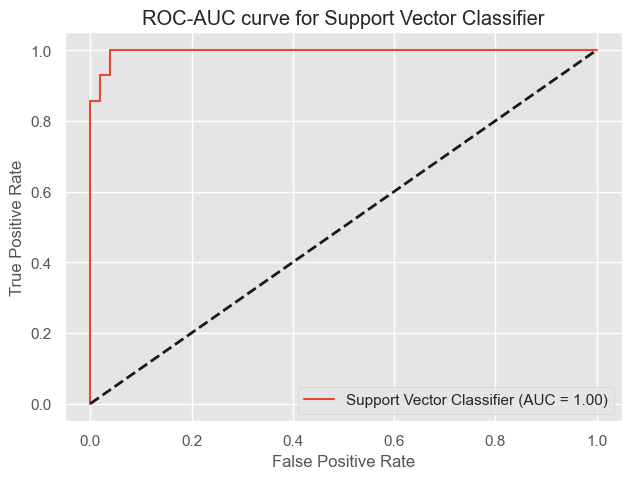


Decision Tree - Train Accuracy: 1.00, Test Accuracy: 0.95
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



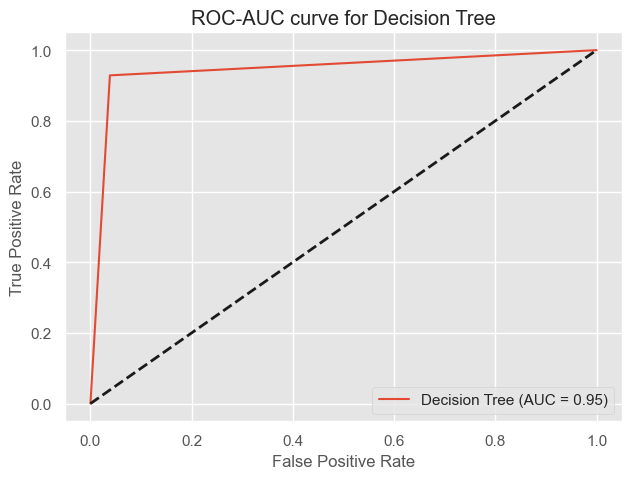


Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.99
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



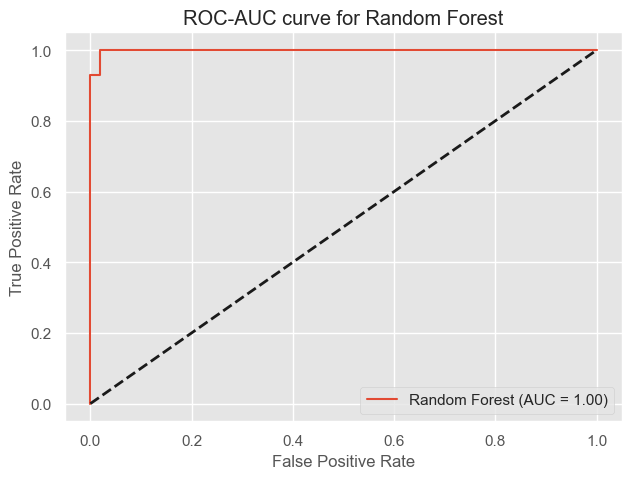


Gradient Boosting - Train Accuracy: 1.00, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



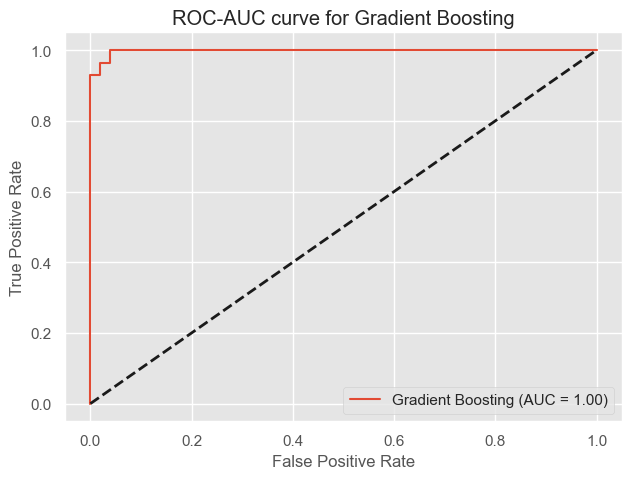


XGBoost - Train Accuracy: 1.00, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



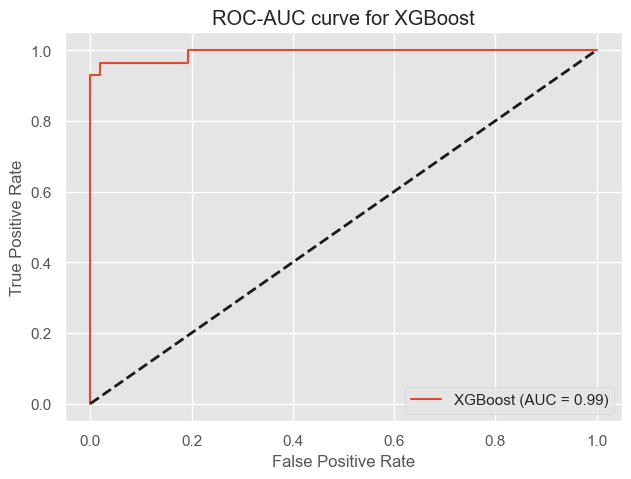

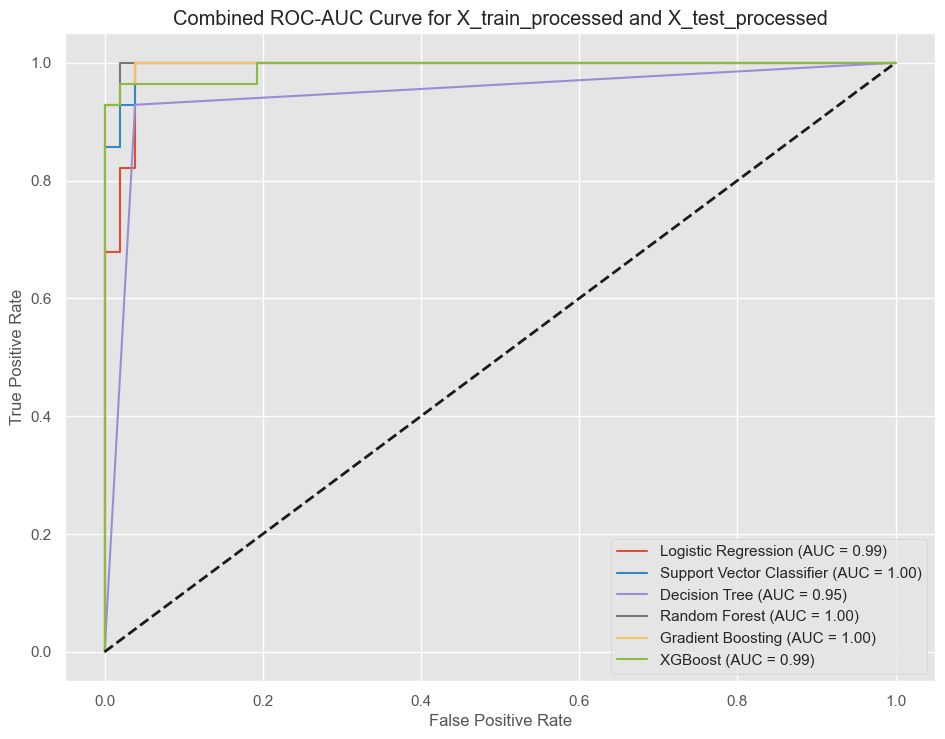

In [333]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    "Support Vector Classifier": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Decision Tree": {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100], 'max_depth': [10, 15], 'min_samples_split': [2, 5]},
    "Gradient Boosting": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100]},
    "XGBoost": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth': [3, 5]}
}
trained_models = {}
print("\n*** Running Models on X_train_processed and X_test_processed ***")
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_processed, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model 

    train_acc, test_acc = evaluate_model(best_model, X_train_processed, X_test_processed, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_processed, y_test, model_name)
# Plot combined ROC-AUC for all models in Section 1
plot_combined_roc_auc(trained_models, X_test_processed, y_test, "X_train_processed and X_test_processed")

#### Modeling Using Mutual-Info Feature Selection


*** Running Models on X_train_kbest_df and X_test_kbest_df ***

Logistic Regression - Train Accuracy: 0.98, Test Accuracy: 0.94
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



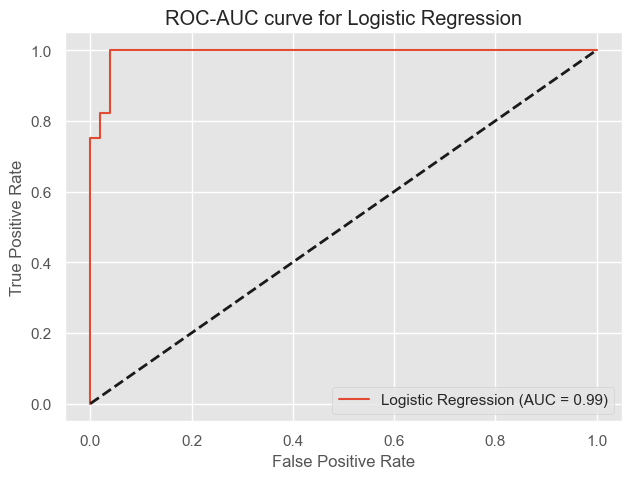


Support Vector Classifier - Train Accuracy: 0.98, Test Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



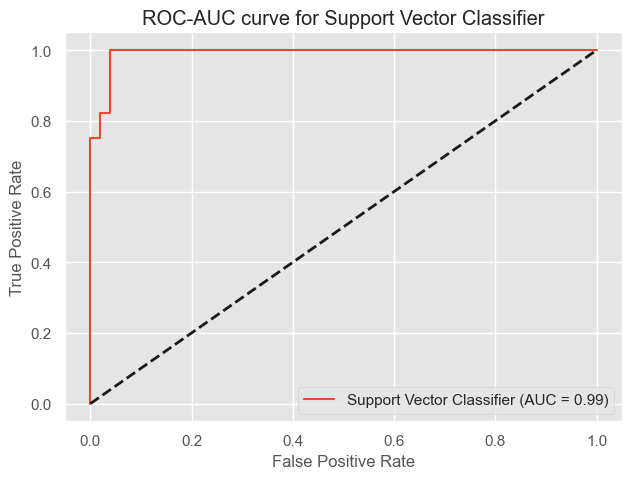


Decision Tree - Train Accuracy: 1.00, Test Accuracy: 0.95
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



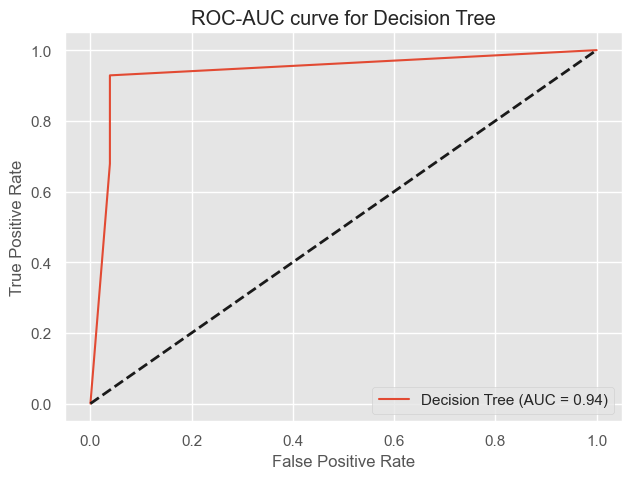


Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



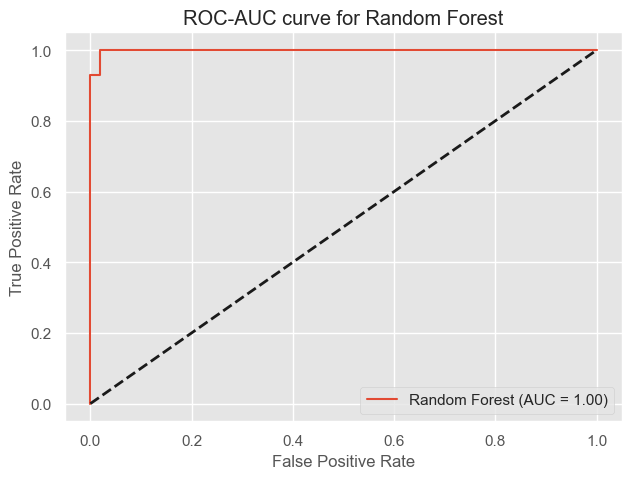


Gradient Boosting - Train Accuracy: 1.00, Test Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



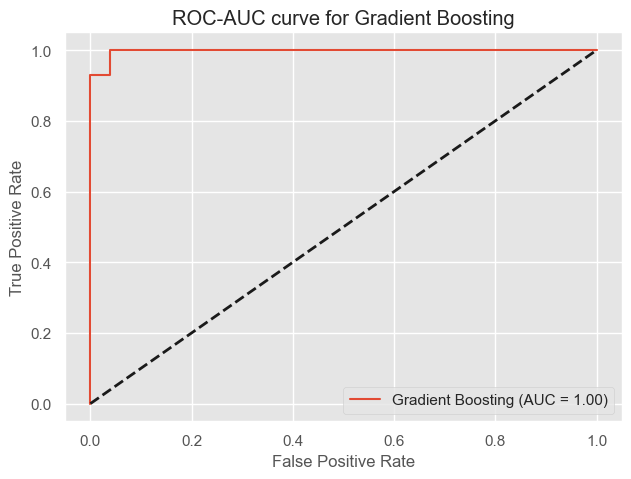


XGBoost - Train Accuracy: 0.99, Test Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



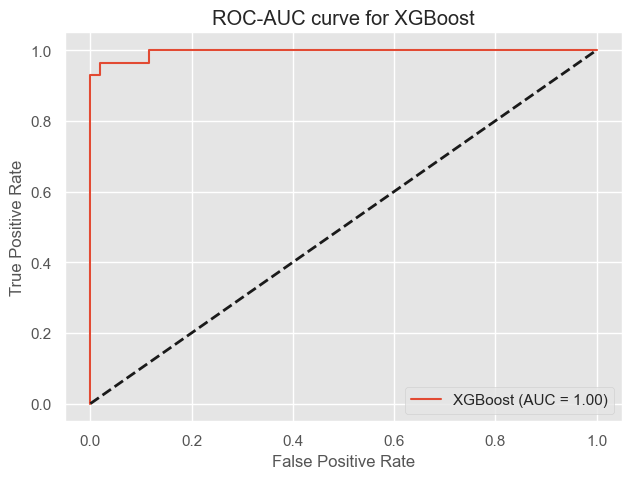

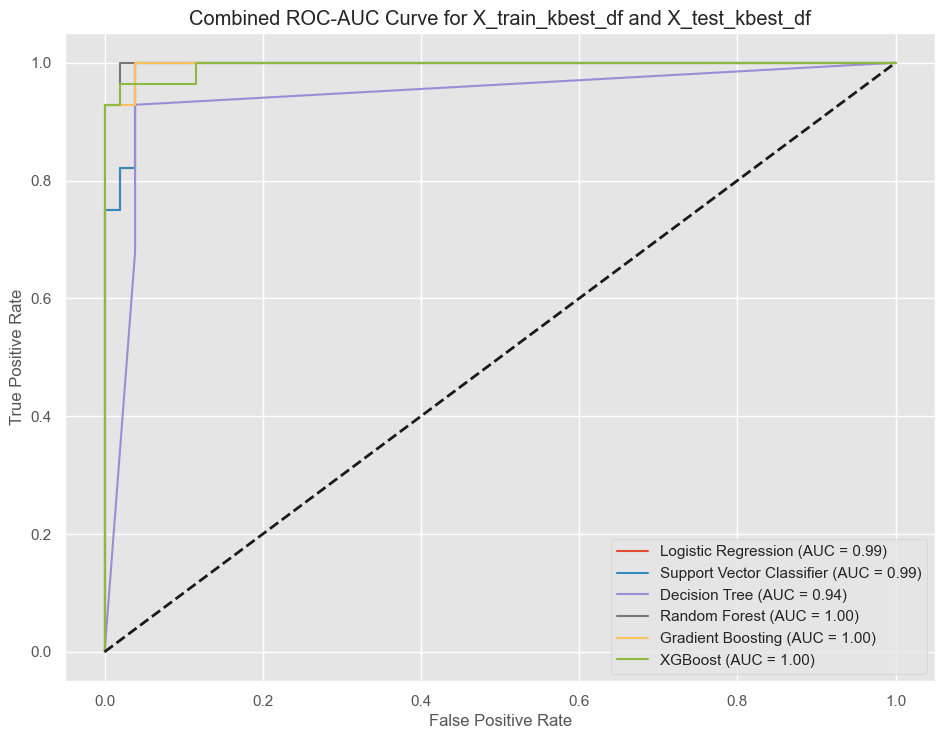

In [335]:
print("\n*** Running Models on X_train_kbest_df and X_test_kbest_df ***")
trained_models = {}
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_kbest_df, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model  # Store the best model for later ROC-AUC plotting
    train_acc, test_acc = evaluate_model(best_model, X_train_kbest_df, X_test_kbest_df, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_kbest_df, y_test, model_name)

# Plot combined ROC-AUC for all models in Section 2
plot_combined_roc_auc(trained_models, X_test_kbest_df, y_test, "X_train_kbest_df and X_test_kbest_df")

#### Modeling Using PCA 


*** Running Models on X_train_pca_df and X_test_pca_df ***

Logistic Regression - Train Accuracy: 0.99, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



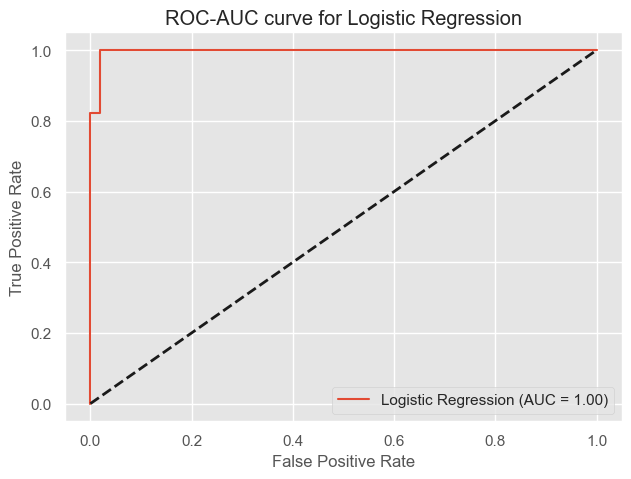


Support Vector Classifier - Train Accuracy: 0.99, Test Accuracy: 0.99
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



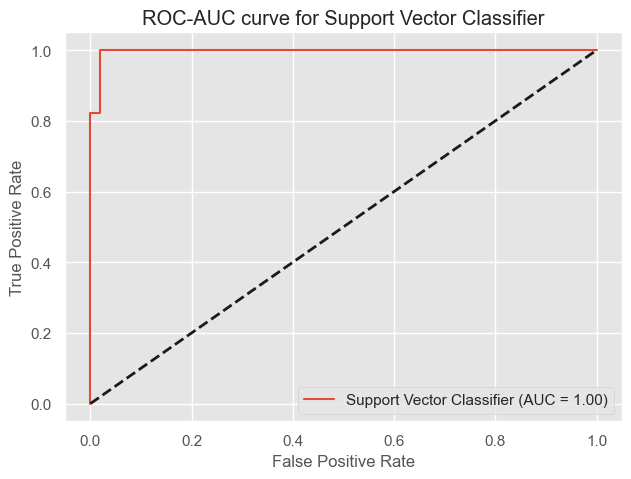


Decision Tree - Train Accuracy: 0.99, Test Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.89      0.94        28

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



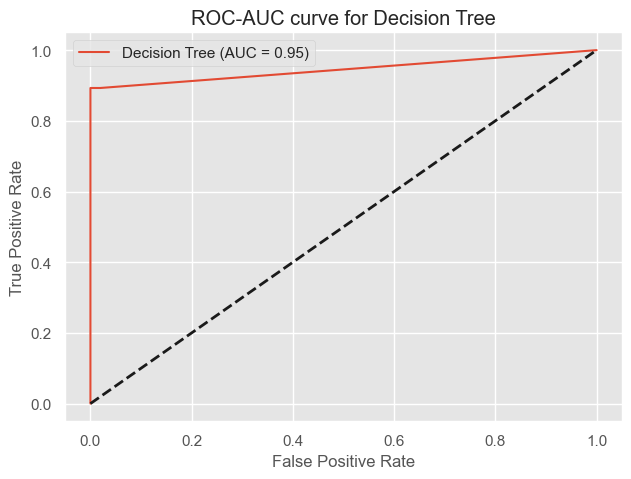


Random Forest - Train Accuracy: 1.00, Test Accuracy: 1.00
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



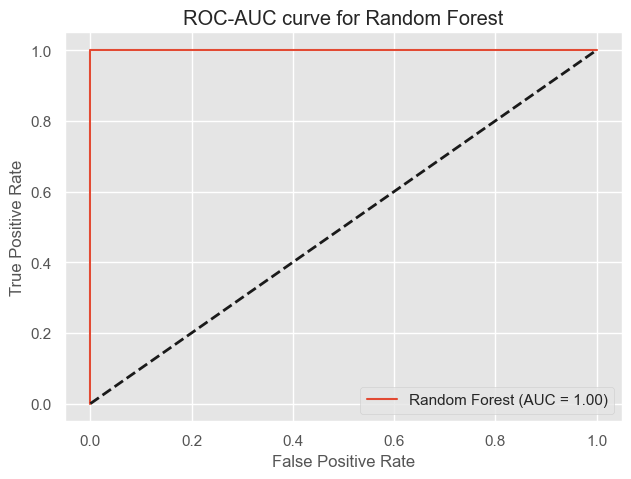


Gradient Boosting - Train Accuracy: 1.00, Test Accuracy: 0.99
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



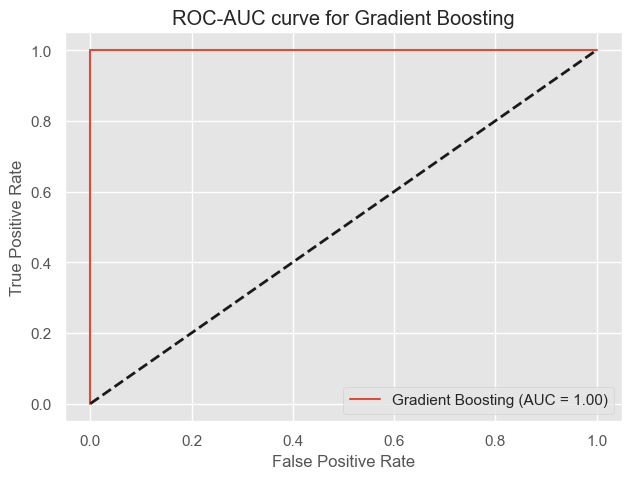


XGBoost - Train Accuracy: 0.99, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



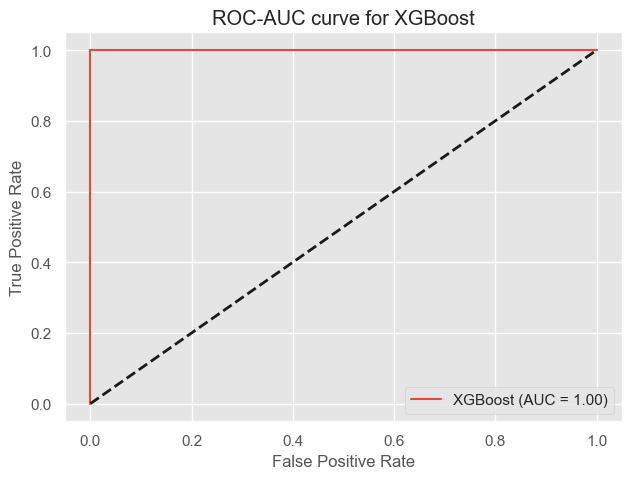

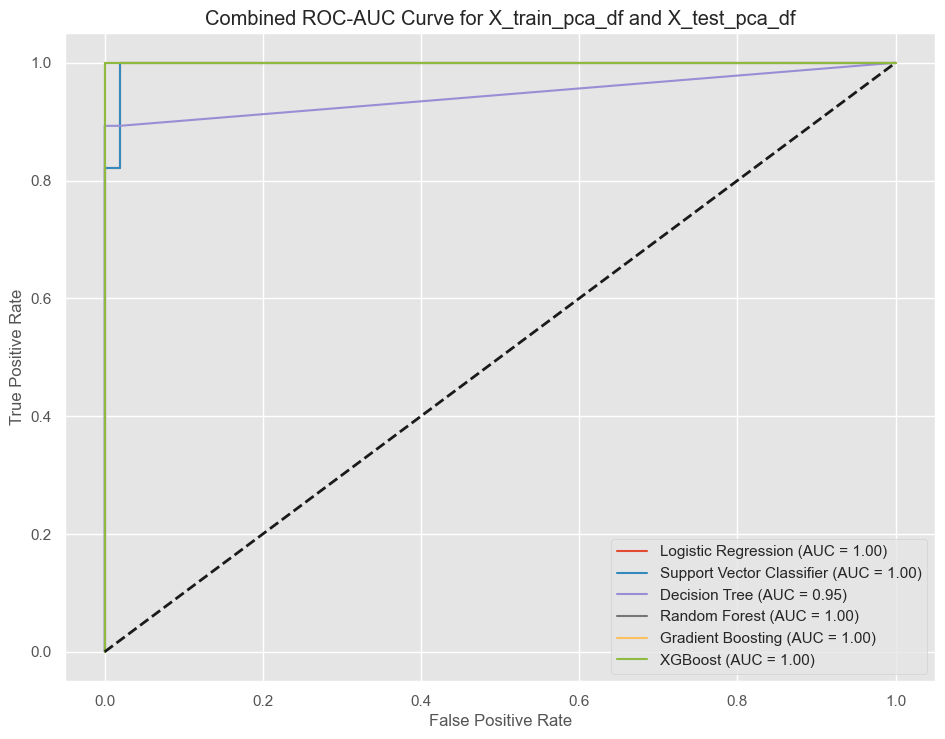

In [336]:
print("\n*** Running Models on X_train_pca_df and X_test_pca_df ***")
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_pca_df, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model  # Store the best model for later ROC-AUC plotting

    train_acc, test_acc = evaluate_model(best_model, X_train_pca_df, X_test_pca_df, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_pca_df, y_test, model_name)
    
# Plot combined ROC-AUC for all models in Section 3
plot_combined_roc_auc(trained_models, X_test_pca_df, y_test, "X_train_pca_df and X_test_pca_df")